In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
print(os.getcwd())

c:\Users\Óscar\Desktop\pandas


In [ ]:
#EDA conjunto de datos relacionado con la campaña de marketing de una institución bancaria


bank_df=pd.read_csv("c:/Users/Óscar/Desktop/pandas/bank-additional.csv")
bank_df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,...,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,...,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,...,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,...,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,...,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [ ]:
#Utilizamos esa primera columna como índice
bank_df=pd.read_csv("c:/Users/Óscar/Desktop/pandas/bank-additional.csv", index_col=0)
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,...,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,...,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,...,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,...,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [ ]:
#Dimensiones del conjunto de datos
bank_df.shape

(43000, 23)

In [ ]:
#Tamaño total
bank_df.size

989000

In [ ]:
#Observamos las columnas del conjunto de datos
bank_df.columns.to_list()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'date',
 'latitude',
 'longitude',
 'id_']

In [ ]:
#Revisamos columnas para ver si contienen comas decimales como strings
columns1 = ["cons.price.idx", "cons.conf.idx", "euribor3m"]

for col in columns1:
    print(f"\nValores únicos en {col}:")
    print(bank_df[col].dropna().unique()[:10])


Valores únicos en cons.price.idx:
['93,994' '94,465' '93,918' '93,444' '93,798' '93,2' '92,756' '92,843'
 '93,075' '92,893']

Valores únicos en cons.conf.idx:
['-36,4' '-41,8' '-42,7' '-36,1' '-40,4' '-42' '-45,9' '-50' '-47,1'
 '-46,2']

Valores únicos en euribor3m:
['4,857' '4,856' '4,855' '4,859' '4,86' '4,858' '4,864' '4,865' '4,866'
 '4,967']


In [ ]:
#Columnas que necesitan conversión
cols_to_convert = ["cons.price.idx", "cons.conf.idx", "euribor3m"]

# Reemplazar comas por puntos y convertir a float
for col in cols_to_convert:
    bank_df[col] = bank_df[col].astype(str).str.replace('"', '').str.replace(',', '.')
    bank_df[col] = pd.to_numeric(bank_df[col], errors='coerce')

In [ ]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,1.1,93.994,-36.4,4.857,5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,...,1.1,93.994,-36.4,NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,...,1.1,93.994,-36.4,4.857,5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,...,1.1,93.994,-36.4,NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,...,1.1,93.994,-36.4,NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [ ]:
#Información general del conjunto de datos   
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37880 non-null  float64
 1   job             42655 non-null  object 
 2   marital         42915 non-null  object 
 3   education       41193 non-null  object 
 4   default         34019 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  float64
 15  cons.conf.idx   43000 non-null  float64
 16  euribor3m       33744 non-null  float64
 17  nr.employed     43000 non-null  obje

In [ ]:
#Número de nulos por columna
bank_df.isnull().sum()

age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64

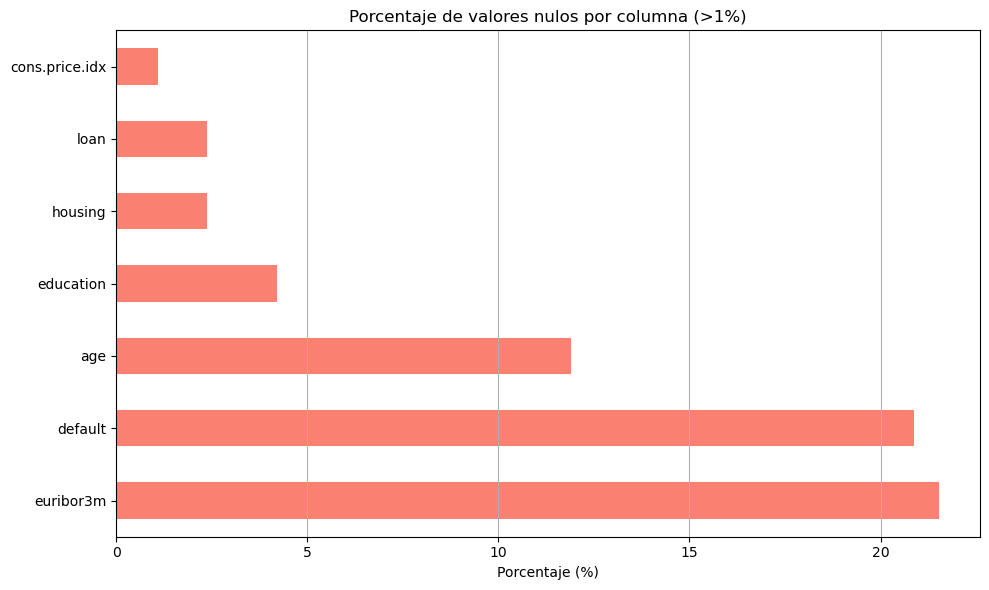

In [ ]:
#Calculamos el porcentaje de nulos
null_percent = bank_df.isnull().mean().sort_values(ascending=False) * 100

#Pintamos los que tengan más del 1% nulos
null_percent[null_percent > 1].plot(kind='barh', figsize=(10,6), color='salmon')
plt.title("Porcentaje de valores nulos por columna (>1%)")
plt.xlabel("Porcentaje (%)")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [ ]:
#Imputación de NaN por columna y eliminación de columnas

#Columna age
bank_df["age"].fillna(bank_df["age"].median(), inplace=True)   #Importante para el análisis. Decido imputar con la mediana al ser mejor en caso de que haya outliers

#Columnas job, marital, education
for col in ["job", "marital", "education"]:
    bank_df[col].fillna(bank_df[col].mode()[0], inplace=True)  #Tienen pocos nulos. Relleno con la categoría más frecuente (moda)

#Columnas default, housing, loan
for col in ["default", "housing", "loan"]:
    bank_df[col].fillna("Unknown", inplace=True)  #Columnas categóricas. Sustituyo el NaN por una nueva categoría ("Unknow")

#Columnas cons.price.idx, euribor3m
bank_df["cons.price.idx"].fillna(bank_df["cons.price.idx"].mean(), inplace=True)
bank_df["euribor3m"].fillna(bank_df["euribor3m"].mean(), inplace=True)            #Importante para el análisis. Imputo con la media al tratarse de tasas/índices

#Eliminamos la columna date
bank_df.drop(columns="date", inplace=True)

#Eliminamos la columna id para tener menos ruido  (al tratarse de un EDA y no vamos a utilizar esta columna para uniones tiene sentido eliminarla, pues no aporta ningún valor y con la columna que hemos utilizado en el index_col es suficiente)
bank_df.drop(columns="id_", inplace=True)

In [ ]:
#Revisamos de nuevo los NaN por columna para verificar
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
latitude          0
longitude         0
dtype: int64

In [ ]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,latitude,longitude
0,38.0,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,...,0,NONEXISTENT,1.1,93.994,-36.4,4.857000,5191,no,41.495,-71.233
1,57.0,services,MARRIED,high.school,Unknown,0.0,0.0,telephone,149,1,...,0,NONEXISTENT,1.1,93.994,-36.4,3.616521,5191,no,34.601,-83.923
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,...,0,NONEXISTENT,1.1,93.994,-36.4,4.857000,5191,no,34.939,-94.847
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,...,0,NONEXISTENT,1.1,93.994,-36.4,3.616521,5191,no,49.041,-70.308
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,...,0,NONEXISTENT,1.1,93.994,-36.4,3.616521,5191,no,38.033,-104.463


In [ ]:
#Estadísticas descriptivas de columnas numéricas
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,latitude,longitude
count,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000
mean,39.741698,257.739279,2.567233,962.330953,0.174023,0.077128,93.574219,-40.509049,3.616521,36.856697,-95.939067
std,9.817735,258.666033,2.772294,187.260394,0.497366,1.573898,0.576365,4.637186,1.538834,7.225948,16.752282
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,24.396000,-124.997000
25%,33.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.466000,30.614750,-110.494250
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.574219,-41.800000,4.076000,36.761000,-95.899500
75%,46.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,43.113250,-81.427750
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,49.384000,-66.937000


In [ ]:
#Análisis de variables categóricas
cat_cols = bank_df.select_dtypes(include="object").columns

#Distribución de categorías por columna
for col in cat_cols:
    print(f"\nDistribución de valores en '{col}':")
    print(bank_df[col].value_counts())


Distribución de valores en 'job':
job
admin.           11218
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
student            903
Name: count, dtype: int64

Distribución de valores en 'marital':
marital
MARRIED     26084
SINGLE      12105
DIVORCED     4811
Name: count, dtype: int64

Distribución de valores en 'education':
education
university.degree      14529
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
illiterate                18
Name: count, dtype: int64

Distribución de valores en 'default':
default
0.0        34016
Unknown     8981
1.0            3
Name: count, dtype: int64

Distribución de valores en 'housing':
housing
1.0        22498
0.0        19476
Unknown     1026
Name: count, dtype: int64

Distribución de valores en

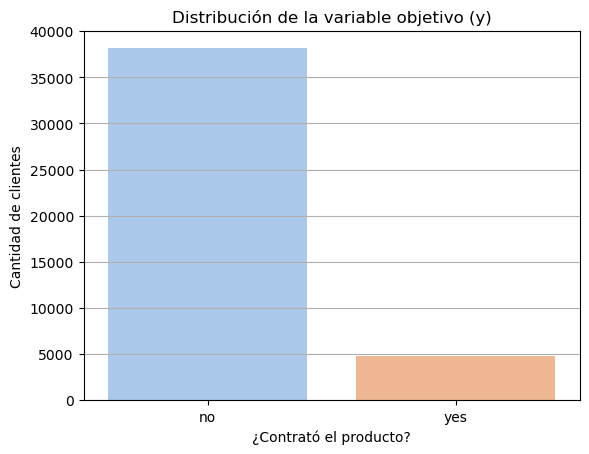

In [ ]:
#Análisis univariado
#Gráfico de barras para la variable objetivo
sns.countplot(data=bank_df, x="y", palette="pastel")
plt.title("Distribución de la variable objetivo (y)")
plt.xlabel("¿Contrató el producto?")
plt.ylabel("Cantidad de clientes")
plt.grid(axis="y")
plt.show()

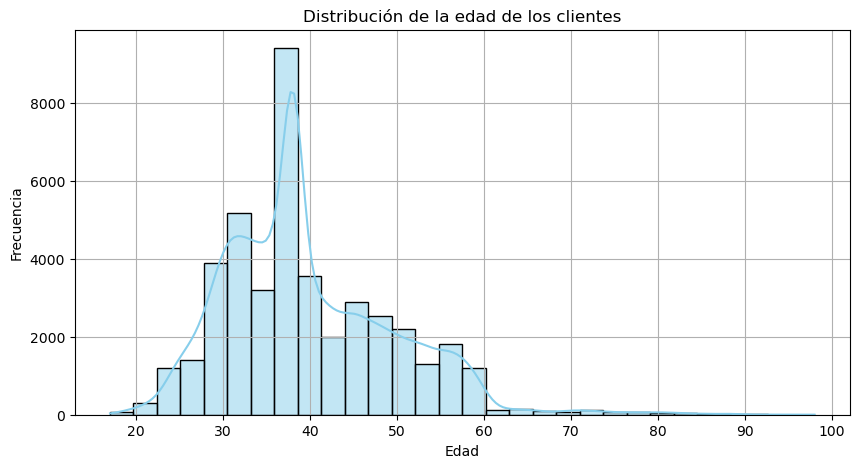

In [ ]:
#Análisis univariado
#Distribución de la edad de los clientes
plt.figure(figsize=(10, 5))
sns.histplot(bank_df["age"], bins=30, kde=True, color='skyblue')
plt.title("Distribución de la edad de los clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

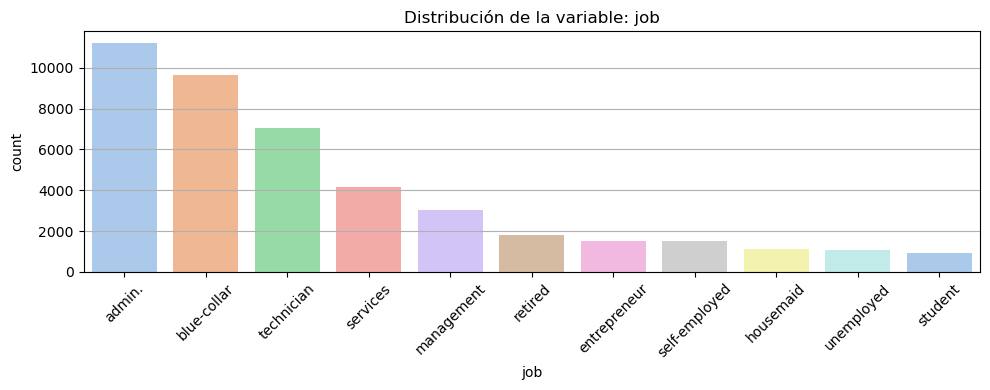

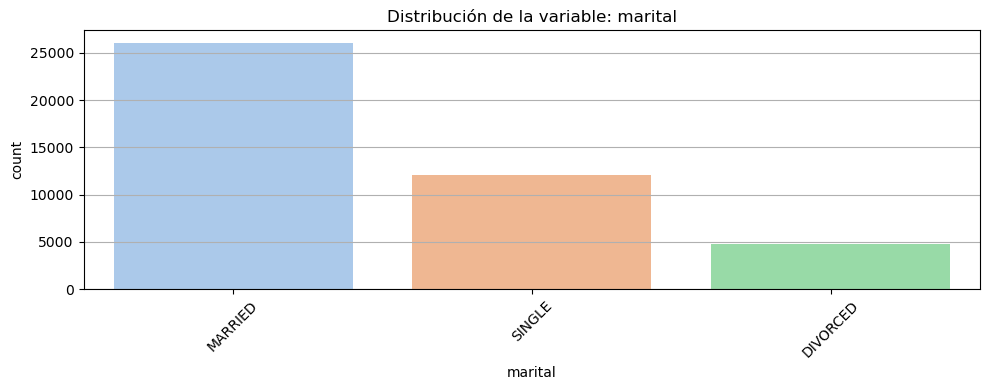

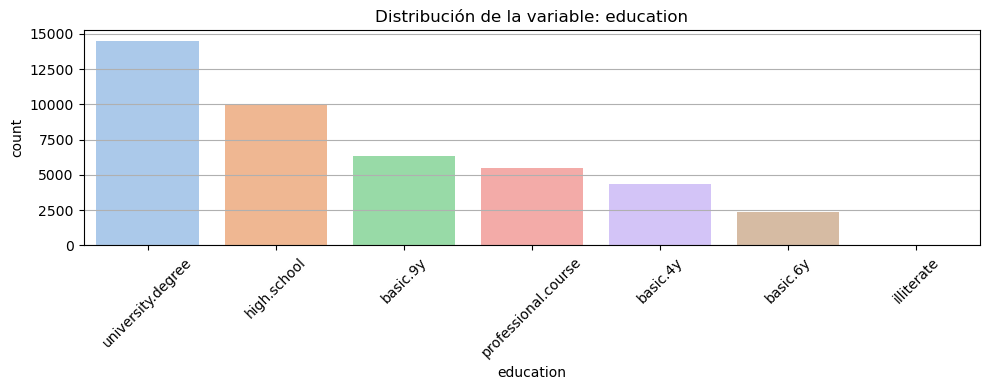

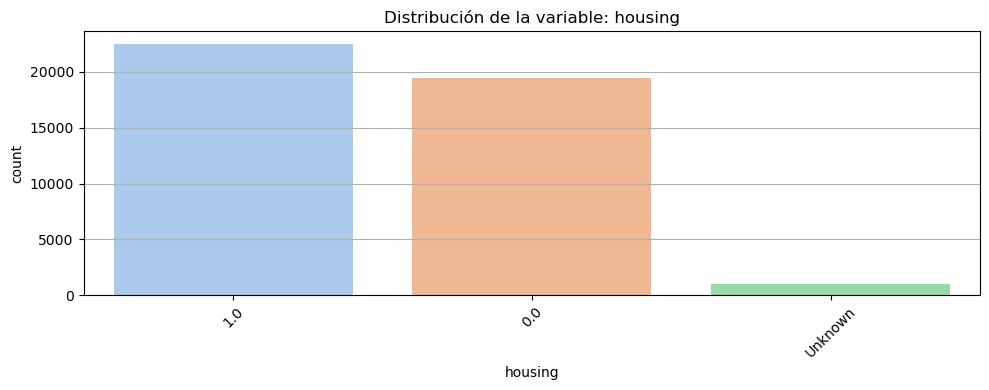

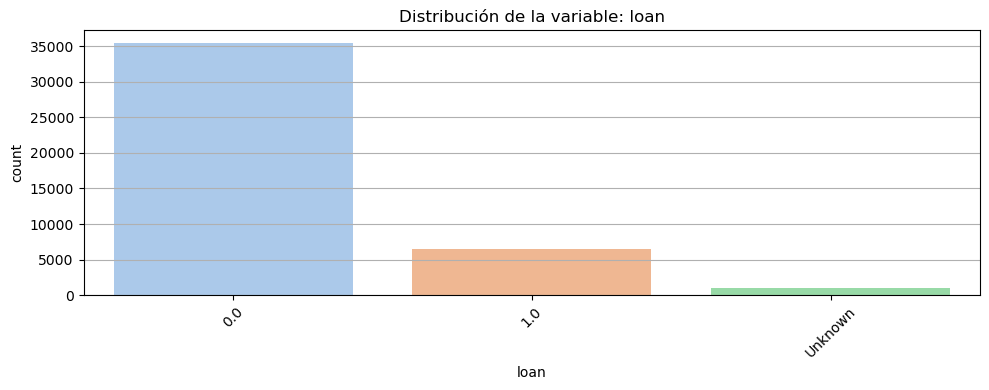

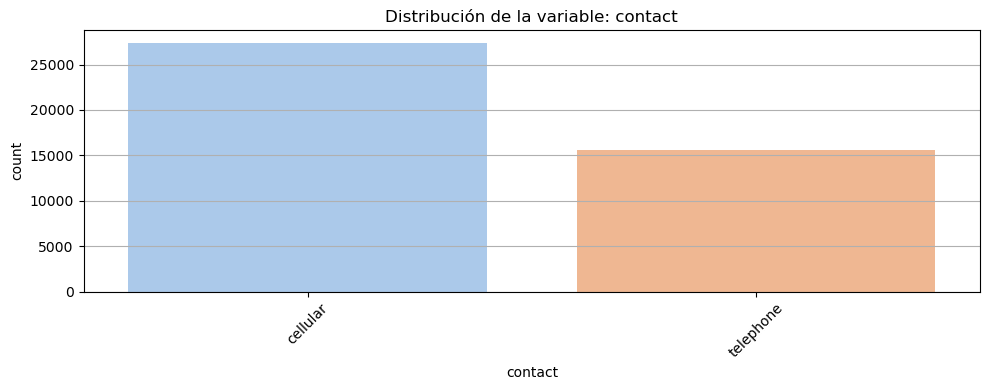

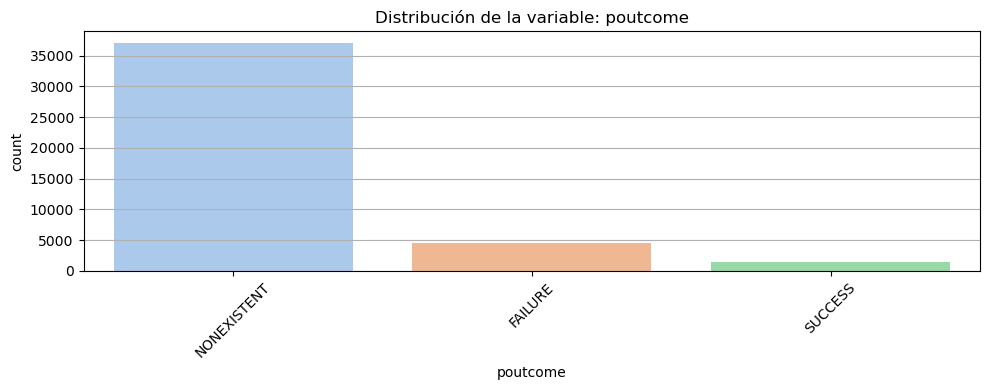

In [ ]:
#Análisis univariado
#Lista de variables categóricas clave
cat_vars = ["job", "marital", "education", "housing", "loan", "contact", "poutcome"]

#Gráficos de barras para cada variable categórica
for col in cat_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=bank_df, x=col, order=bank_df[col].value_counts().index, palette="pastel")
    plt.title(f"Distribución de la variable: {col}")
    plt.xticks(rotation=45)
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()

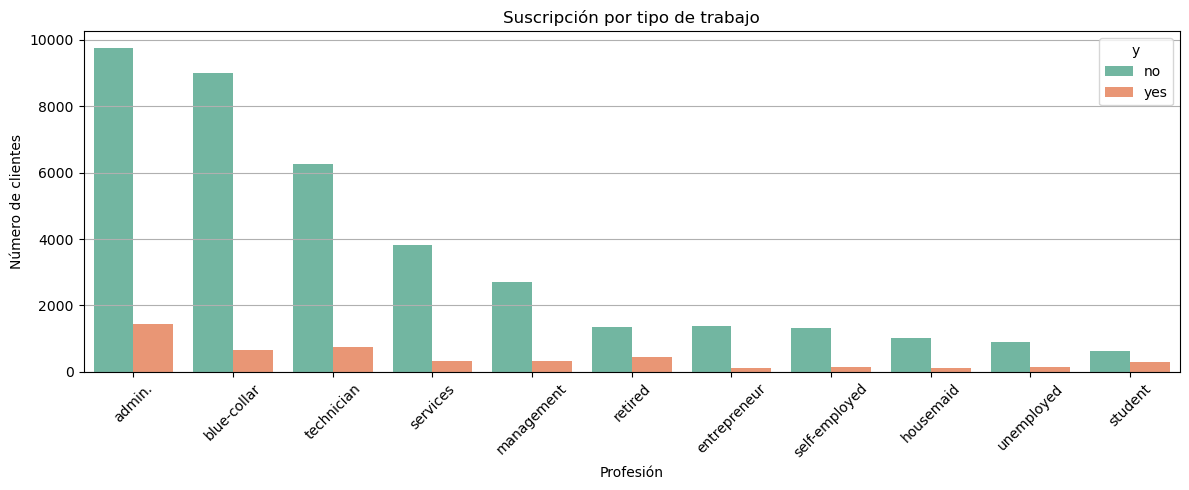

In [ ]:
#Análisis bivariado
#Gráfico de barras apilado para saber que profesionales tienen mayor tasa de conversión
plt.figure(figsize=(12, 5))
sns.countplot(data=bank_df, x="job", hue="y", palette="Set2", order=bank_df["job"].value_counts().index)
plt.title("Suscripción por tipo de trabajo")
plt.xlabel("Profesión")
plt.ylabel("Número de clientes")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

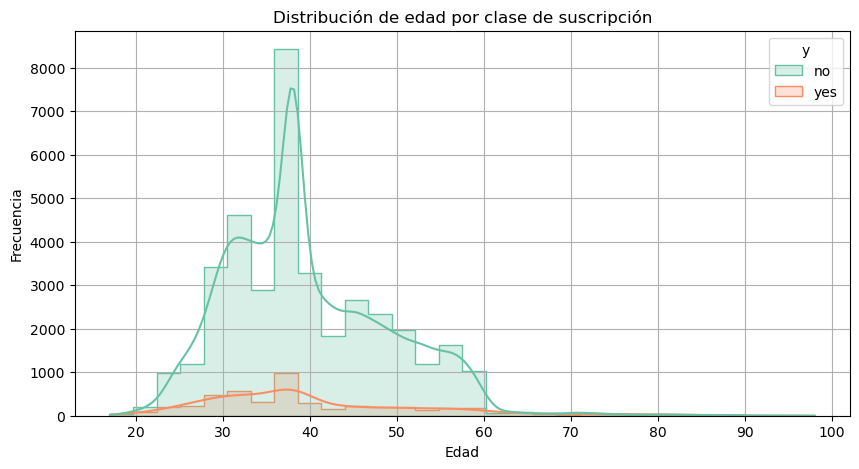

In [ ]:
#Análisis bivariado
#Distribución para detectar si hay algún patrón por edades
plt.figure(figsize=(10, 5))
sns.histplot(data=bank_df, x="age", hue="y", bins=30, kde=True, palette="Set2", element="step")
plt.title("Distribución de edad por clase de suscripción")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

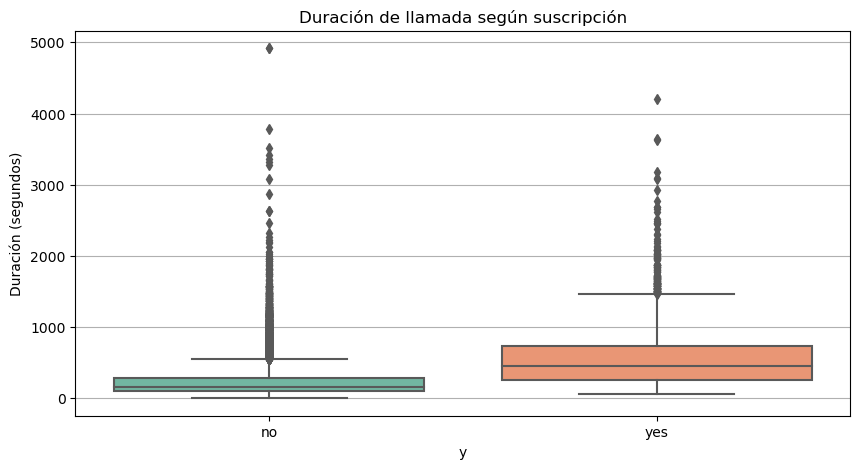

In [ ]:
#Análisis bivariado
#Box-plot para ver si la duración de la llamada puede influir en la decisión del cliente
plt.figure(figsize=(10, 5))
sns.boxplot(data=bank_df, x="y", y="duration", palette="Set2")
plt.title("Duración de llamada según suscripción")
plt.ylabel("Duración (segundos)")
plt.grid(axis="y")
plt.show()

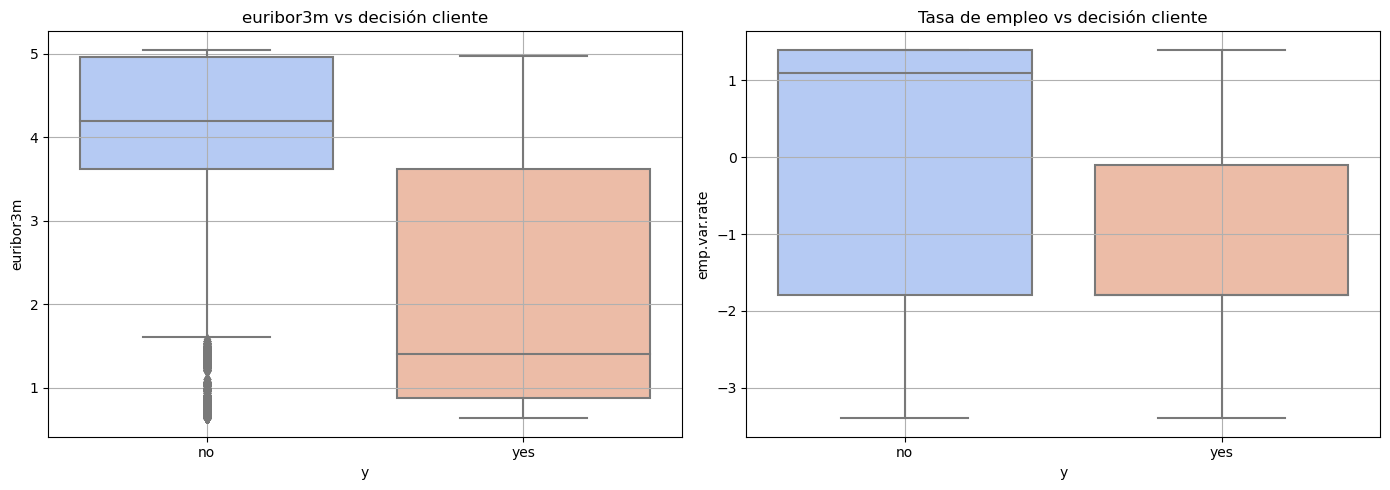

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(data=bank_df, x="y", y="euribor3m", ax=axes[0], palette="coolwarm")
axes[0].set_title("euribor3m vs decisión cliente")
axes[0].grid(True)

sns.boxplot(data=bank_df, x="y", y="emp.var.rate", ax=axes[1], palette="coolwarm")
axes[1].set_title("Tasa de empleo vs decisión cliente")
axes[1].grid(True)

plt.tight_layout()
plt.show()

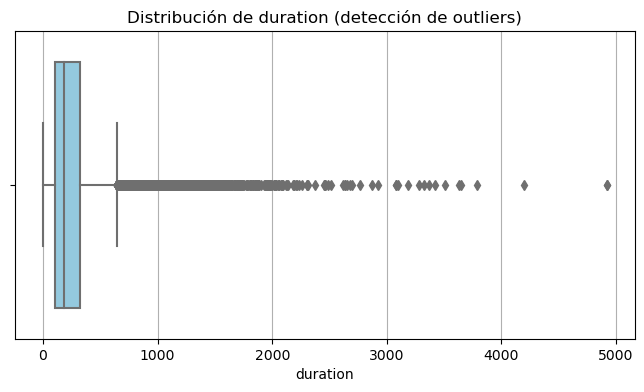

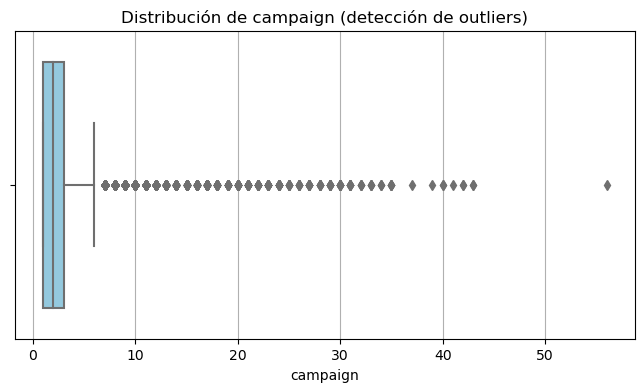

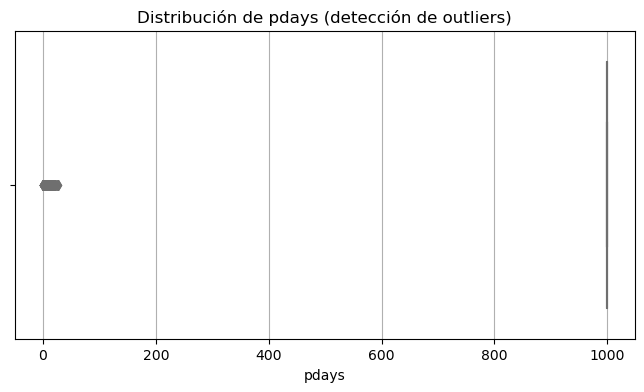

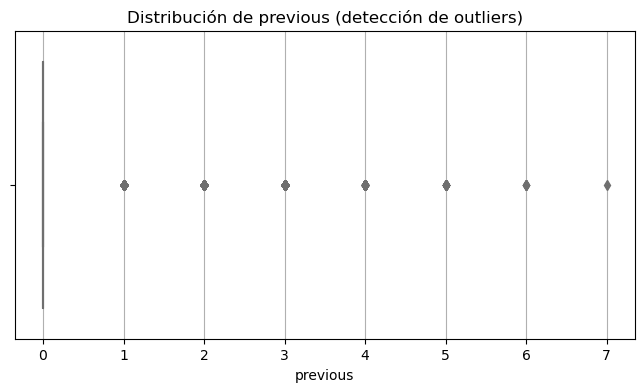

In [ ]:
#Detección de outliers
num_vars = ["duration", "campaign", "pdays", "previous"]
for col in num_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=bank_df[col], color='skyblue')
    plt.title(f"Distribución de {col} (detección de outliers)")
    plt.grid(axis='x')
    plt.show()

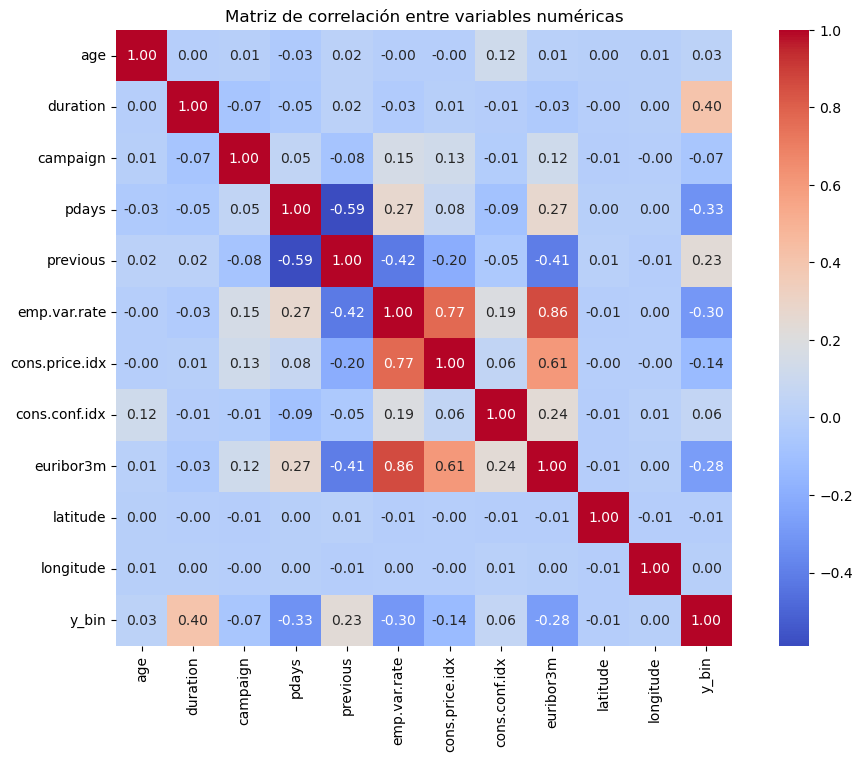

In [ ]:
#Primero convierto variable objetivo a binario para análisis de correlación
bank_df_corr = bank_df.copy()
bank_df_corr["y_bin"] = bank_df_corr["y"].map({"yes": 1, "no": 0})

#Selecciono solo numéricas
num_corr = bank_df_corr.select_dtypes(include="number")

#Matriz de correlación entre variables numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(num_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

In [ ]:
#Guardo el conjunto de datos limpio
bank_df.to_csv("c:/Users/Óscar/Desktop/pandas/bank_df_clean", index=False)

In [2]:
#EDA conjunto de datos Excel características demográficas y comportamiento de compra de los clientes del banco

#Cargamos todas las hojas como diccionario
sheets_dict = pd.read_excel("c:/Users/Óscar/Desktop/pandas/customer-details.xlsx", sheet_name=None)

#Combino todas las hojas en un solo DataFrame
customer_df = pd.concat(sheets_dict.values(), ignore_index=True)
customer_df.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [3]:
#Dimensiones
customer_df.shape

(43170, 7)

In [4]:
#Tanaño df
customer_df.size

302190

In [5]:
#Observamos las columnas del conjunto de datos
customer_df.columns.to_list()

['Unnamed: 0',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'NumWebVisitsMonth',
 'ID']

In [6]:
#Eliminamos la columna innecesaria "Unnamed:0"
customer_df.drop(columns="Unnamed: 0", inplace=True)
customer_df.head()

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [7]:
#Información del conjunto de datos
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Income             43170 non-null  int64         
 1   Kidhome            43170 non-null  int64         
 2   Teenhome           43170 non-null  int64         
 3   Dt_Customer        43170 non-null  datetime64[ns]
 4   NumWebVisitsMonth  43170 non-null  int64         
 5   ID                 43170 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 2.0+ MB


In [8]:
#Observamos en número de NaN
customer_df.isnull().sum()

Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64

In [9]:
#Convierto columna de fecha a datetime
customer_df["Dt_Customer"] = pd.to_datetime(customer_df["Dt_Customer"])

#Extraigo año y mes
customer_df["Customer_Year"] = customer_df["Dt_Customer"].dt.year
customer_df["Customer_Month"] = customer_df["Dt_Customer"].dt.month

customer_df.head()

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,Customer_Year,Customer_Month
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079,2012,4
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097,2012,12
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b,2012,2
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e,2012,12
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,2012,6


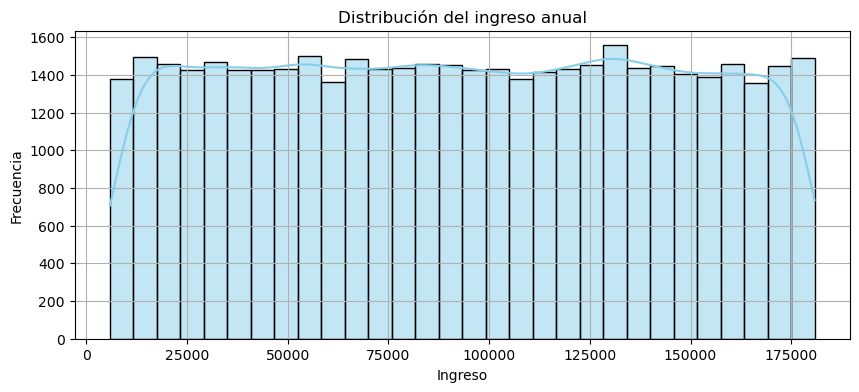

In [ ]:
#Análisis univariado
#Income
plt.figure(figsize=(10, 4))
sns.histplot(customer_df["Income"], bins=30, kde=True, color='skyblue')
plt.title("Distribución del ingreso anual")
plt.xlabel("Ingreso")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

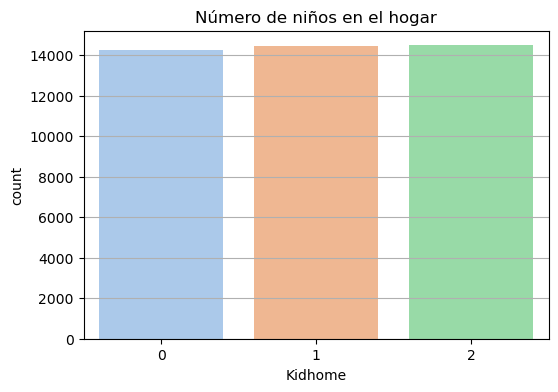

In [23]:
#Análisis univariado
#Kidhome
plt.figure(figsize=(6, 4))
sns.countplot(x="Kidhome", data=customer_df, palette="pastel")
plt.title("Número de niños en el hogar")
plt.grid(axis='y')
plt.show()

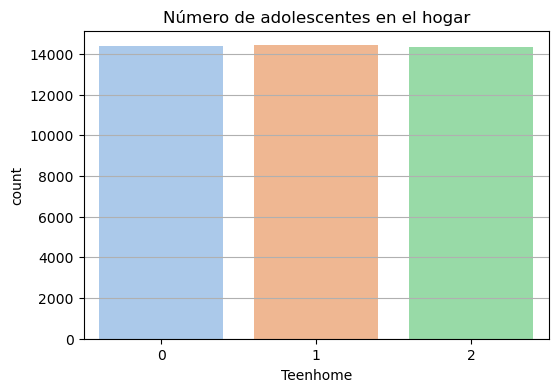

In [24]:
#Análisis univariado
#Teenhome
plt.figure(figsize=(6, 4))
sns.countplot(x="Teenhome", data=customer_df, palette="pastel")
plt.title("Número de adolescentes en el hogar")
plt.grid(axis='y')
plt.show()

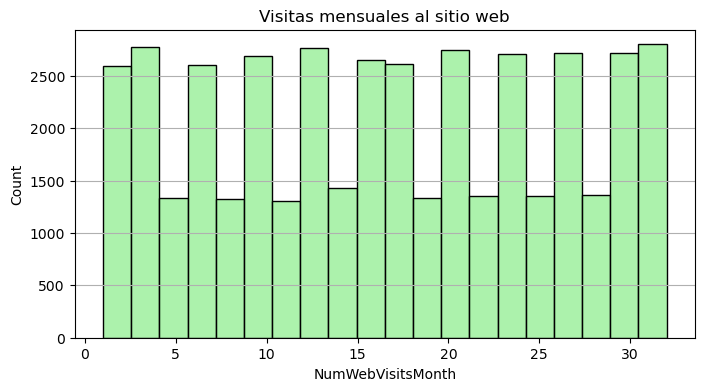

In [25]:
#Análisis univariado
#NumWebVisitsMonth
plt.figure(figsize=(8, 4))
sns.histplot(customer_df["NumWebVisitsMonth"], bins=20, kde=False, color='lightgreen')
plt.title("Visitas mensuales al sitio web")
plt.grid(axis='y')
plt.show()

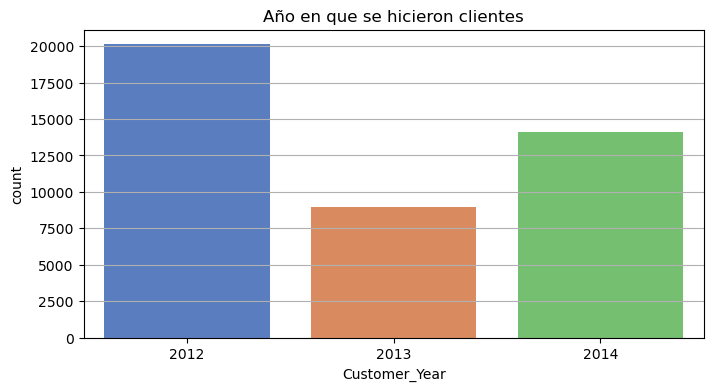

In [26]:
#Análisis univariado
#Año de alta como cliente
plt.figure(figsize=(8, 4))
sns.countplot(x="Customer_Year", data=customer_df, palette="muted")
plt.title("Año en que se hicieron clientes")
plt.grid(axis='y')
plt.show()

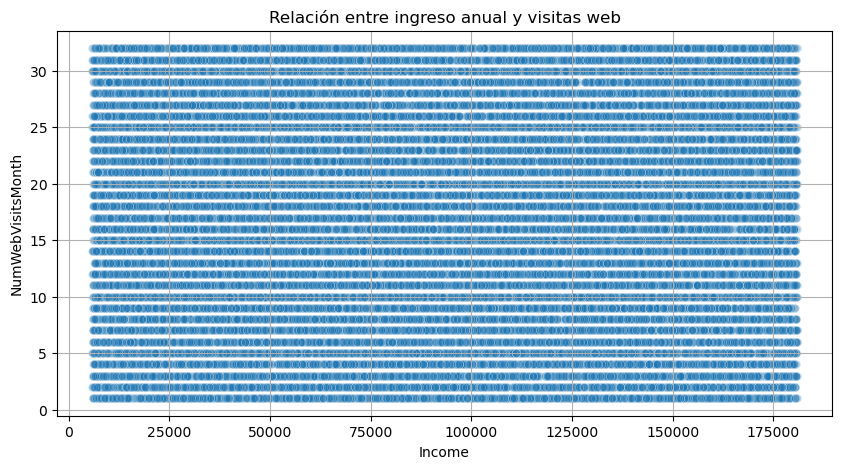

In [27]:
#Análisis bivariado
#Income vs NumWebVisitsMonth
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Income", y="NumWebVisitsMonth", data=customer_df, alpha=0.3)
plt.title("Relación entre ingreso anual y visitas web")
plt.grid(True)
plt.show()

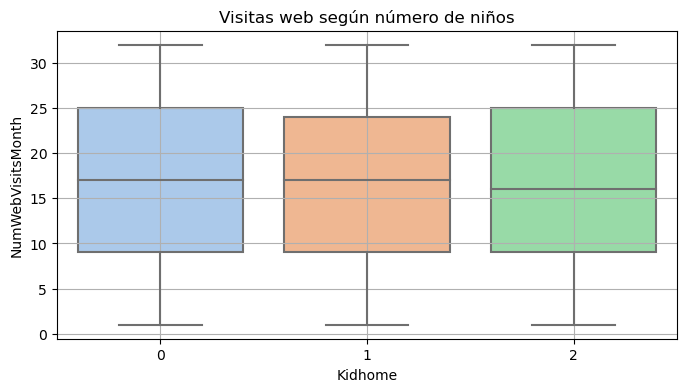

In [28]:
#Análisis bivariado
#Kidhome vs NumWebVisitsMonth
plt.figure(figsize=(8, 4))
sns.boxplot(x="Kidhome", y="NumWebVisitsMonth", data=customer_df, palette="pastel")
plt.title("Visitas web según número de niños")
plt.grid(True)
plt.show()

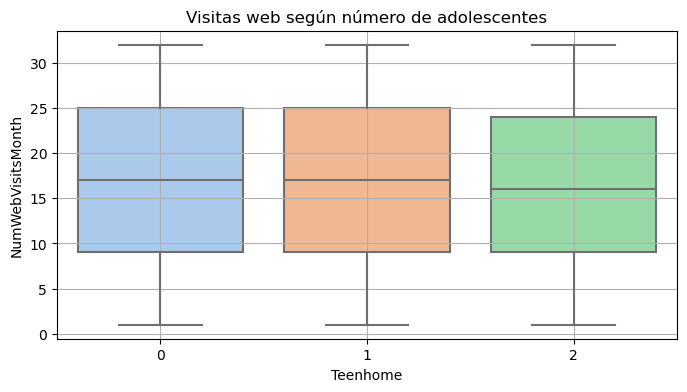

In [29]:
#Análisis bivariado
#Teenhome vs NumWebVisitsMonth
plt.figure(figsize=(8, 4))
sns.boxplot(x="Teenhome", y="NumWebVisitsMonth", data=customer_df, palette="pastel")
plt.title("Visitas web según número de adolescentes")
plt.grid(True)
plt.show()

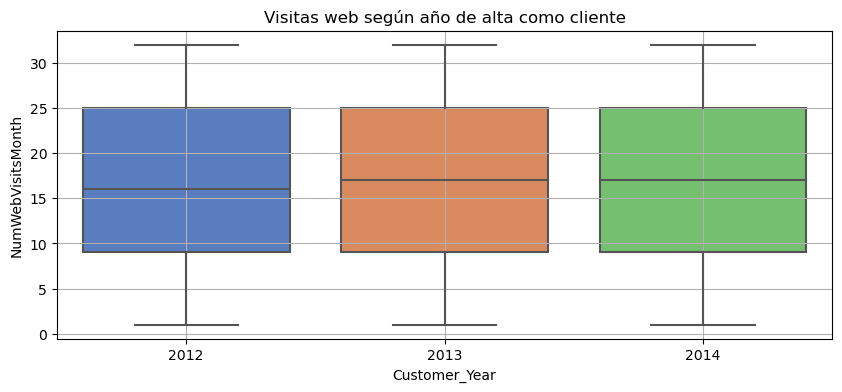

In [30]:
#Análisis bivariado
#Año de alta vs NumWebVisitsMonth
plt.figure(figsize=(10, 4))
sns.boxplot(x="Customer_Year", y="NumWebVisitsMonth", data=customer_df, palette="muted")
plt.title("Visitas web según año de alta como cliente")
plt.grid(True)
plt.show()

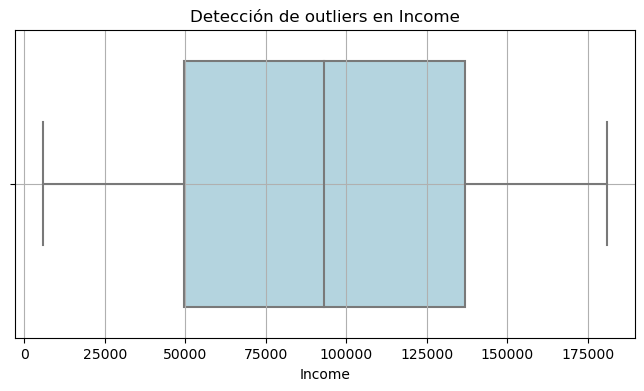

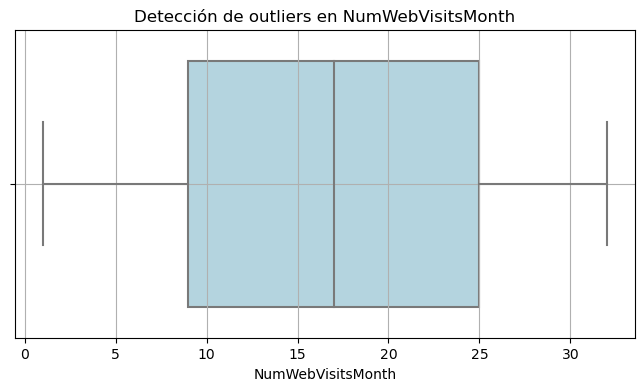

In [31]:
#Detección de outliers en ingresos y visitas a la página web
cols = ["Income", "NumWebVisitsMonth"]
for col in cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=customer_df[col], color="lightblue")
    plt.title(f"Detección de outliers en {col}")
    plt.grid(True)
    plt.show()

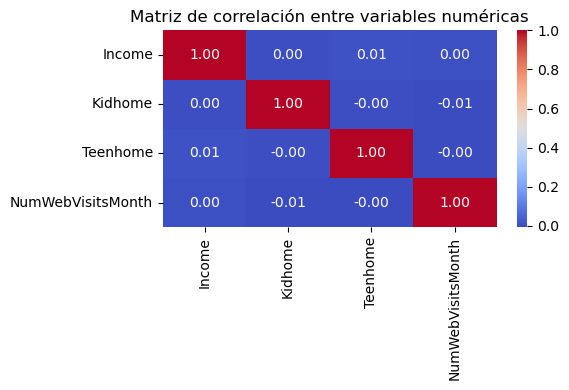

In [33]:
#Matriz de correlación
correlation_df = customer_df[["Income", "Kidhome", "Teenhome", "NumWebVisitsMonth"]]
correlation_matrix = correlation_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.tight_layout()
plt.show()

In [14]:
#Guardo el conjunto de datos limpio
customer_df.to_csv("c:/Users/Óscar/Desktop/pandas/customer_df_clean", index=False)